<a href="https://colab.research.google.com/github/Tony14100/Date-cocktail/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BD%D0%B0%D1%80%D0%BA%D0%BE%D1%82%D0%B8%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

наркотиков

Данные

Код (145)

Обсуждение (4)

Метаданные
О наборе данных
Контекст
Поскольку для новичка в машинном обучении это была бы прекрасная возможность попробовать некоторые методы прогнозирования действия лекарств, которые могут быть точными для пациента.

Содержание
Целевой особенностью является
Тип препарата
Наборы функций:
Возраст
Секс
Уровни артериального давления (АД)
Уровни холестерина
Соотношение Na к калию
Вдохновение
Основная проблема здесь не только в наборах функций и целевых наборах, но и в подходе, который используется при решении подобных задач новичком. Так что удачи.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving drug200.csv to drug200.csv


In [ ]:
pip install tensorflow_decision_forests

In [ ]:
pip install wurlitzer

In [ ]:
import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

from IPython.core.magic import register_line_magic
from IPython.display import Javascript

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import tensorflow as tf
import datetime

In [ ]:
# Some of the model training logs can cover the full
# screen if not compressed to a smaller viewport.
# This magic allows setting a max height for a cell.
@register_line_magic
def set_cell_height(size):
  display(
      Javascript("google.colab.output.setIframeHeight(0, true, {maxHeight: " +
                 str(size) + "})"))

In [ ]:
# Check the version of TensorFlow Decision Forests
print("Found TensorFlow Decision Forests v" + tfdf.__version__)

Found TensorFlow Decision Forests v0.2.4


In [ ]:
df = pd.read_csv("drug200.csv")

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
# Encode the categorical label into an integer.
#
# Details:
# This stage is necessary if your classification label is represented as a
# string. Note: Keras expected classification labels to be integers.

# Name of the label column.
label = "Drug"

classes = df[label].unique().tolist()
print(f"Label classes: {classes}")

df[label] = df[label].map(classes.index)

Label classes: ['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']


In [ ]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

139 examples in training, 61 examples for testing.


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2036: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


In [ ]:
%set_cell_height 300

# Specify the model.
model_1 = tfdf.keras.RandomForestModel()

# Optionally, add evaluation metrics.
model_1.compile(
    metrics=["accuracy"])

# Train the model.
# "sys_pipes" is optional. It enables the display of the training logs.
with sys_pipes():
  model_1.fit(x=train_ds)

In [ ]:
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 982ms/step - loss: 0.0000e+00 - accuracy: 1.0000

loss: 0.0000
accuracy: 1.0000


In [ ]:
model_1.save("/tmp/my_saved_model")

INFO:tensorflow:Assets written to: /tmp/my_saved_model/assets


INFO:tensorflow:Assets written to: /tmp/my_saved_model/assets


In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

In [ ]:
%set_cell_height 300
model_1.summary()

<IPython.core.display.Javascript object>

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	Age
	BP
	Cholesterol
	Na_to_K
	Sex

No weights

Variable Importance: MEAN_MIN_DEPTH:
    1.     "__LABEL"  3.109294 ################
    2.         "Sex"  3.101442 ###############
    3. "Cholesterol"  2.587684 #############
    4.         "Age"  2.435673 ############
    5.          "BP"  0.908381 ###
    6.     "Na_to_K"  0.262500 

Variable Importance: NUM_AS_ROOT:
    1. "Na_to_K" 229.000000 ################
    2.      "BP" 71.000000 

Variable Importance: NUM_NODES:
    1.          "BP" 629.000000 ################
    2.     "Na_to_K" 417.000000 ##########
    3.         "Age" 351.000000 ########
    4. "Cholesterol" 

In [ ]:
# The input features
model_1.make_inspector().features()

["Age" (1; #0),
 "BP" (4; #1),
 "Cholesterol" (4; #2),
 "Na_to_K" (1; #3),
 "Sex" (4; #4)]

In [ ]:
# The feature importances
model_1.make_inspector().variable_importances()

{'MEAN_MIN_DEPTH': [("__LABEL" (4; #5), 3.1092936507936324),
  ("Sex" (4; #4), 3.1014417989417806),
  ("Cholesterol" (4; #2), 2.58768386243386),
  ("Age" (1; #0), 2.435673280423286),
  ("BP" (4; #1), 0.9083809523809497),
  ("Na_to_K" (1; #3), 0.26249999999999973)],
 'NUM_AS_ROOT': [("Na_to_K" (1; #3), 229.0), ("BP" (4; #1), 71.0)],
 'NUM_NODES': [("BP" (4; #1), 629.0),
  ("Na_to_K" (1; #3), 417.0),
  ("Age" (1; #0), 351.0),
  ("Cholesterol" (4; #2), 278.0),
  ("Sex" (4; #4), 4.0)],
 'SUM_SCORE': [("Na_to_K" (1; #3), 28648.726227752864),
  ("BP" (4; #1), 17059.78270188719),
  ("Age" (1; #0), 5081.836222448386),
  ("Cholesterol" (4; #2), 3115.043964281678),
  ("Sex" (4; #4), 28.04154707491398)]}

In [ ]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=139, accuracy=0.9784172661870504, loss=0.05156101320247106, rmse=None, ndcg=None, aucs=None)

In [ ]:
%set_cell_height 150
model_1.make_inspector().training_logs()

<IPython.core.display.Javascript object>

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=48, accuracy=0.9791666666666666, loss=0.7509094079335531, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=138, accuracy=0.9782608695652174, loss=0.06683161390432413, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=139, accuracy=0.9856115107913669, loss=0.0538306367590273, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=139, accuracy=0.9856115107913669, loss=0.05165589691923677, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=139, accuracy=0.9856115107913669, loss=0.045334934009064874, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=139, accuracy=0.9856115107913669, loss=0.04444737137436009, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=61, evaluation=Evaluation(num_examples=139, accuracy=0.9856

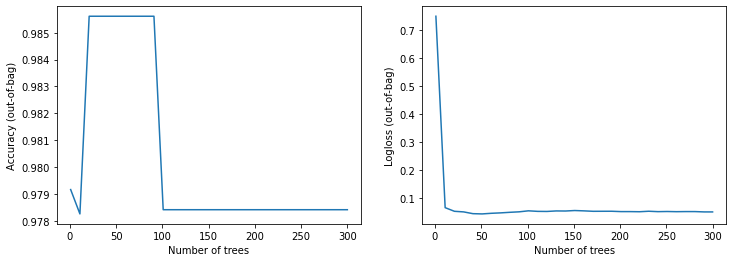

In [ ]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()